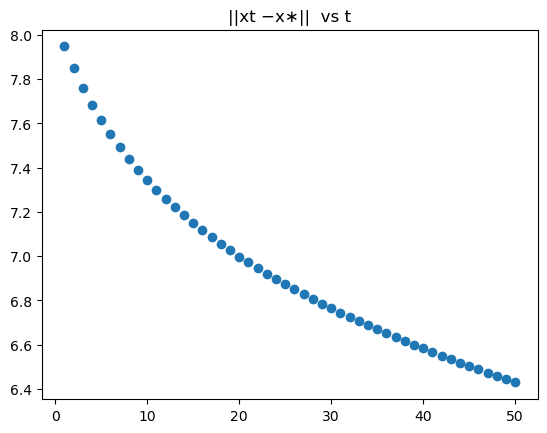

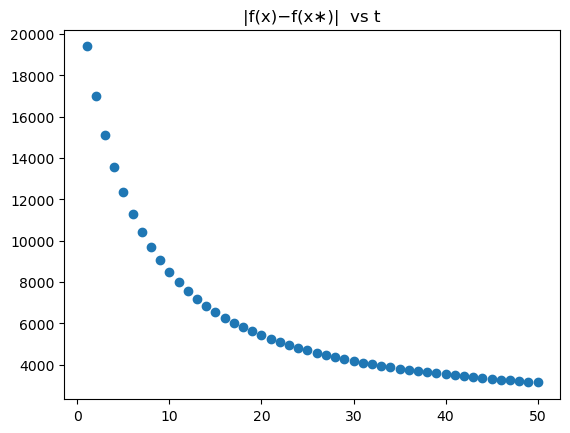

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def rosenbrock(x,y):
    return (1 - x)*(1 - x) + 100 * (y - x*x)*(y - x*x)

def rosenbrock_grad(x,y):
    return np.array([
        2 * (x - 1) - 4 * 100 * x * (y - x**2),
        2 * 100 * (y - x**2)
    ])

def rosenbrock_hess(x,y):
    return np.matrix([
        [2 - 4 * 100 * (y - 3 * x**2), -4 * 100 * x],
        [-4 * 100 * x, 2 * 100]
    ])




def gradient_descent(rosenbrock_grad, x, alpha, t):
    x1val=np.array([])
    x2val=np.array([])
    zval=np.array([])
    yval=np.array([]) 
    k=t
    while t!=0:
        x = x - alpha * rosenbrock_grad(x[0],x[1])
        
        zval=np.append(zval,rosenbrock(x[0],x[1]))
        yval=np.append(yval,math.sqrt(((x[0]-1)*(x[0]-1))+((x[1]-1)*(x[1]-1))))
        x1val=np.append(x1val,x[0])
        x2val=np.append(x2val,x[1])
        t=t-1
    return zval,yval,x1val,x2val,k
        
zval,yval,x1val,x2val,t=gradient_descent(rosenbrock_grad, np.array([-3,-6]),0.00001,50)
r=list(range(1, t+1))
plt.scatter(r, yval)
plt.title("||xt −x∗||  vs t")
fig =plt.figure()  
plt.scatter(r, zval) 
plt.title("|f(x)−f(x∗)|  vs t")
plt.show()


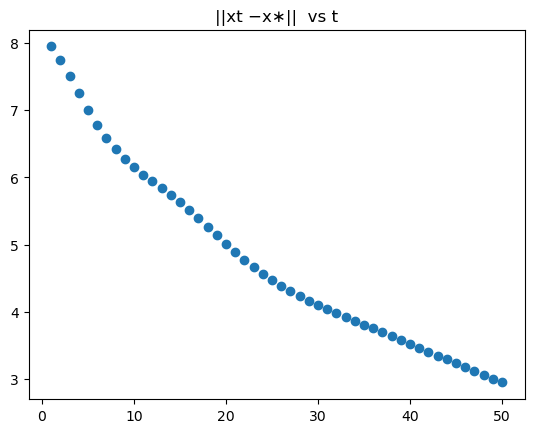

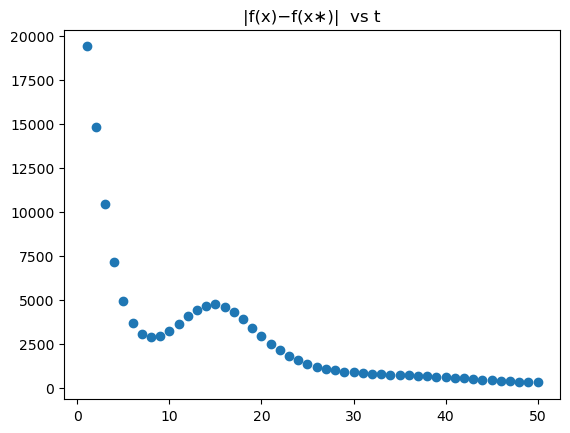

In [2]:
def Heavy_Ball(rosenbrock_grad, x, alpha, t,beta): 
    xOld=x
    x1val=np.array([])
    x2val=np.array([])
    zval=np.array([])
    yval=np.array([])
    k=t
    while t!=0:
        xtemp=x
        x = x - alpha * rosenbrock_grad(x[0],x[1])+beta*(x-xOld)
        
        zval=np.append(zval,rosenbrock(x[0],x[1]))
        yval=np.append(yval,math.sqrt(((x[0]-1)*(x[0]-1))+((x[1]-1)*(x[1]-1))))
        x1val=np.append(x1val,x[0])
        x2val=np.append(x2val,x[1])
        xOld=xtemp 
        t=t-1
    return zval,yval,x1val,x2val,k 

zval,yval,x1val,x2val,t= Heavy_Ball(rosenbrock_grad, np.array([-3,-6]),0.00001,50,0.9)
r=list(range(1, t+1))
plt.scatter(r, yval)
plt.title("||xt −x∗||  vs t")
fig =plt.figure()  
plt.scatter(r, zval) 
plt.title("|f(x)−f(x∗)|  vs t")
plt.show()

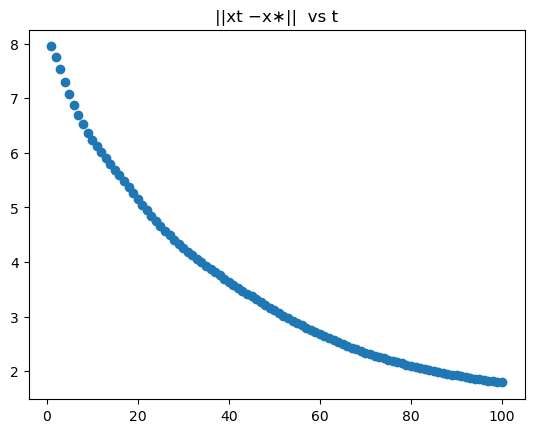

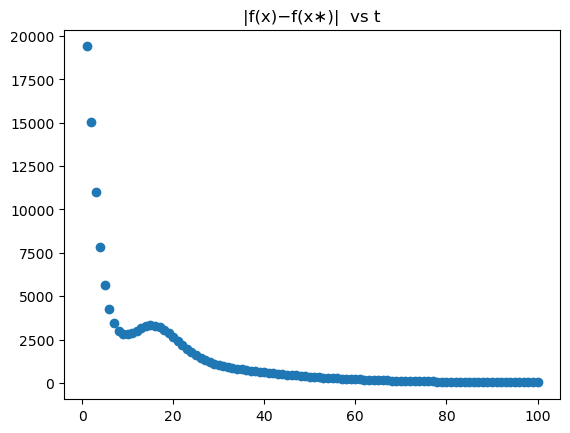

In [3]:
def NAGM(rosenbrock_grad, x, alpha, t,beta):
    x1val=np.array([])
    x2val=np.array([])
    zval=np.array([])
    yval=np.array([])
    xOld=x
    k=t
    while t!=0:
        xtemp=x
        x = x - alpha * rosenbrock_grad((x+beta*(x-xOld))[0],(x+beta*(x-xOld))[1])+beta*(x-xOld)  
        
        zval=np.append(zval,rosenbrock(x[0],x[1]))
        yval=np.append(yval,math.sqrt(((x[0]-1)*(x[0]-1))+((x[1]-1)*(x[1]-1))))
        x1val=np.append(x1val,x[0])
        x2val=np.append(x2val,x[1])
        xOld=xtemp 
        t=t-1
    return zval,yval,x1val,x2val,k

zval,yval,x1val,x2val,t= NAGM(rosenbrock_grad, np.array([-3,-6]),0.00001,100,0.9)
r=list(range(1, t+1))
plt.scatter(r, yval)
plt.title("||xt −x∗||  vs t")
fig =plt.figure()  
plt.scatter(r, zval) 
plt.title("|f(x)−f(x∗)|  vs t")
plt.show()

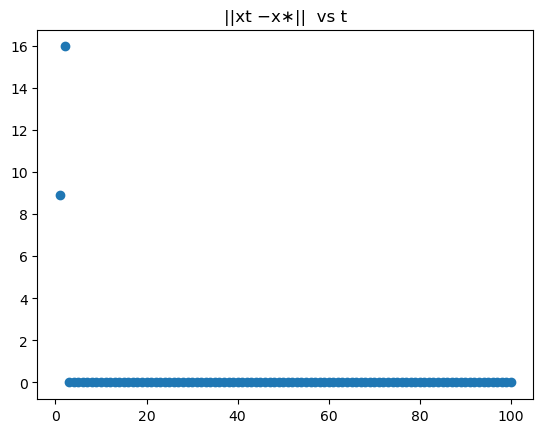

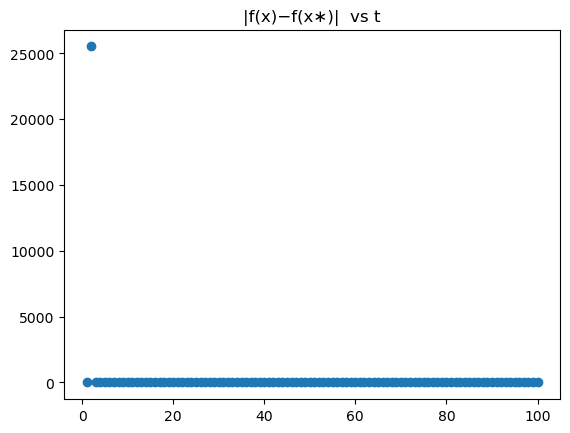

In [4]:
def newton(rosenbrock_grad, rosenbrock_hess, x,t):
    x1val=np.array([])
    x2val=np.array([])
    zval=np.array([])
    yval=np.array([])
    k=t
    while t!=0:
        x = x - np.linalg.solve(rosenbrock_hess(x[0],x[1]), rosenbrock_grad(x[0],x[1]))
        
        zval=np.append(zval,rosenbrock(x[0],x[1]))
        yval=np.append(yval,math.sqrt(((x[0]-1)*(x[0]-1))+((x[1]-1)*(x[1]-1))))
        x1val=np.append(x1val,x[0])
        x2val=np.append(x2val,x[1])
        t=t-1
    return zval,yval,x1val,x2val,k 
zval,yval,x1val,x2val,t= newton(rosenbrock_grad,rosenbrock_hess, np.array([-3,-6]),100)
r=list(range(1, t+1))
plt.scatter(r, yval)
plt.title("||xt −x∗||  vs t")
fig =plt.figure()  
plt.scatter(r, zval) 
plt.title("|f(x)−f(x∗)|  vs t")
plt.show()

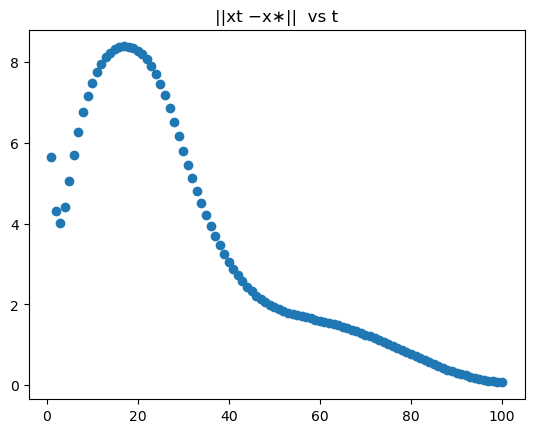

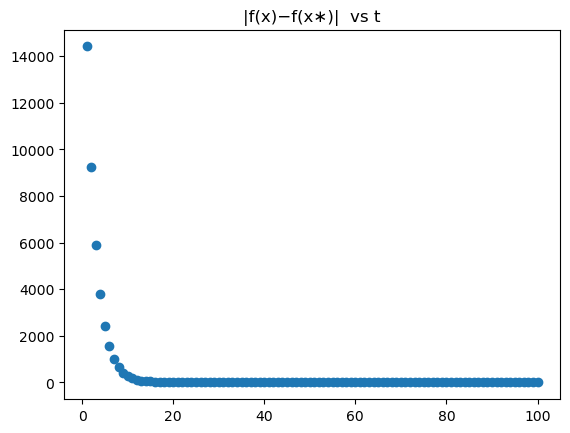

In [5]:
def Qnewton(rosenbrock_grad, rosenbrock_gradhess, x, t,alpha):
    x1val=np.array([])
    x2val=np.array([])
    zval=np.array([])
    yval=np.array([])
    k=t
    while t!=0:
        x = x - alpha*np.linalg.solve(rosenbrock_hess(x[0],x[1]), rosenbrock_grad(x[0],x[1]))
        
        zval=np.append(zval,rosenbrock(x[0],x[1]))
        yval=np.append(yval,math.sqrt(((x[0]-1)*(x[0]-1))+((x[1]-1)*(x[1]-1))))
        x1val=np.append(x1val,x[0])
        x2val=np.append(x2val,x[1])
        t=t-1
    return zval,yval,x1val,x2val,k  

zval,yval,x1val,x2val,t= Qnewton(rosenbrock_grad,rosenbrock_hess, np.array([-3,-6]),100,0.2)
r=list(range(1, t+1))
plt.scatter(r, yval)
plt.title("||xt −x∗||  vs t")
fig =plt.figure()  
plt.scatter(r, zval) 
plt.title("|f(x)−f(x∗)|  vs t")
plt.show()

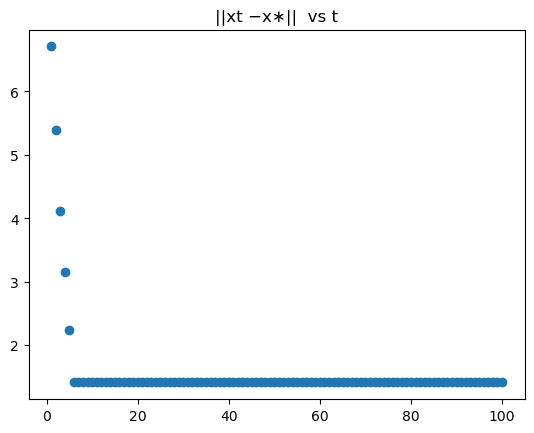

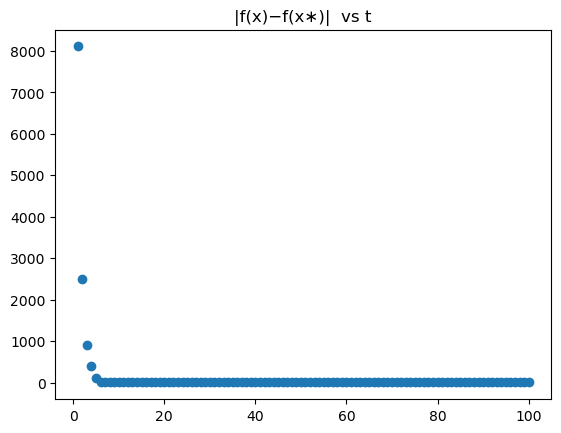

In [6]:
def RMS(rosenbrock_grad, x, alpha, t,beta):
    v=np.zeros(2)
    x1val=np.array([])
    x2val=np.array([])
    zval=np.array([])
    yval=np.array([])
    k=t
    while t!=0:
        v[0]=beta*v[0]+(1-beta)*(((rosenbrock_grad(x[0],x[1]))[0])*(rosenbrock_grad(x[0],x[1]))[0])
        v[1]=beta*v[1]+(1-beta)*(((rosenbrock_grad(x[0],x[1]))[1])*(rosenbrock_grad(x[0],x[1]))[1])        
        x[0] = x[0] - (alpha * rosenbrock_grad(x[0],x[1])[0])/math.sqrt(v[0])
        x[1] = x[1] - (alpha * rosenbrock_grad(x[0],x[1])[1])/math.sqrt(v[1])
        
        zval=np.append(zval,rosenbrock(x[0],x[1]))
        yval=np.append(yval,math.sqrt(((x[0]-1)*(x[0]-1))+((x[1]-1)*(x[1]-1))))
        x1val=np.append(x1val,x[0])
        x2val=np.append(x2val,x[1])
        t=t-1
    return zval,yval,x1val,x2val,k  

zval,yval,x1val,x2val,t= RMS(rosenbrock_grad, np.array([-3,-6]),0.00005,100,0.9)
r=list(range(1, t+1))
plt.scatter(r, yval)
plt.title("||xt −x∗||  vs t")
fig =plt.figure()  
plt.scatter(r, zval) 
plt.title("|f(x)−f(x∗)|  vs t")
plt.show()

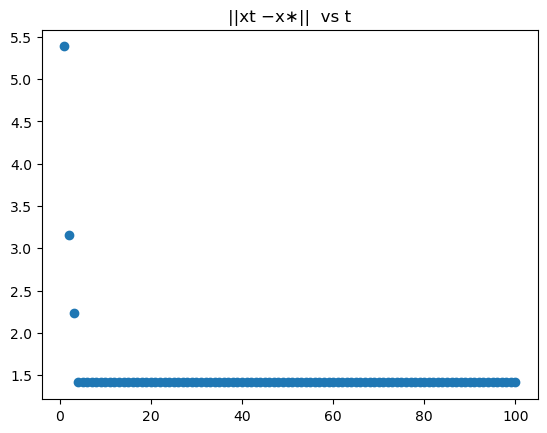

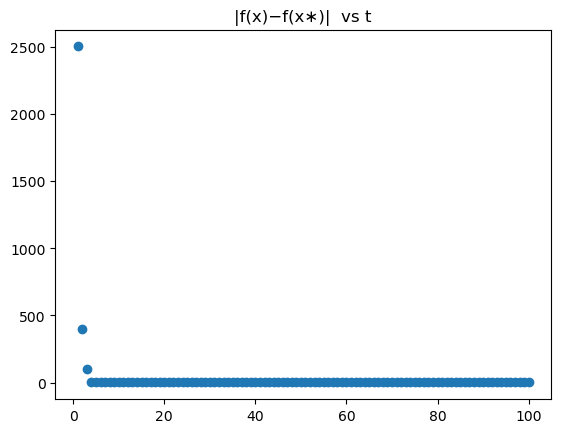

In [7]:
def Adam(rosenbrock_grad, x, alpha, t,beta1,beta2,epsilon):
    
    v=np.zeros(2)
    v0=np.zeros(2)  
    count=0
    m=np.zeros(2)
    x1val=np.array([])
    x2val=np.array([])
    zval=np.array([])
    yval=np.array([])
    k=t
    while t!=0:
        count=count+1
        m=beta1*m+(1-beta1)*((rosenbrock_grad(x[0],x[1])))
        m0=m/(1-pow(beta1,count)) 
        v[1]=beta2*v[1]+(1-beta2)*(((rosenbrock_grad(x[0],x[1]))[1])**2) 
        v[0]=beta2*v[0]+(1-beta2)*(((rosenbrock_grad(x[0],x[1]))[0])**2)
        v0[1]=v[1]/(1-pow(beta2,count)) 
        v0[0]=v[0]/(1-pow(beta2,count))            
        x[0] = x[0] - (alpha * (m0[0]/(math.sqrt(v[0]) + epsilon))) 
        x[1] = x[1] - (alpha * (m0[1]/(math.sqrt(v[1]) + epsilon))) 
        
        zval=np.append(zval,rosenbrock(x[0],x[1]))       
        yval=np.append(yval,math.sqrt(((x[0]-1)*(x[0]-1))+((x[1]-1)*(x[1]-1))))
        x1val=np.append(x1val,x[0])
        x2val=np.append(x2val,x[1])
        t=t-1
    return zval,yval,x1val,x2val,k  

zval,yval,x1val,x2val,t= Adam(rosenbrock_grad, np.array([-3,-6]),0.5,100,0.9,0.9,0.1)
r=list(range(1, t+1))
plt.scatter(r, yval)
plt.title("||xt −x∗||  vs t")
fig =plt.figure()  
plt.scatter(r, zval) 
plt.title("|f(x)−f(x∗)|  vs t")
plt.show()  